In [1]:
import pandas as pd
import matplotlib.pyplot as plt
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
#load dataset into panda Dataframe
df=pd.read_csv(url,names=['sepal length','sepal width','petal length','petal width','target'])

In [2]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# feature Scaling, feature selection,feature extraction
from sklearn.preprocessing import StandardScaler
features=['sepal length','sepal width','petal length','petal width']
#Seperating out the features
x=df.loc[:,features].values
#Seperating out the target
y=df.loc[:,['target']].values
#Standardizing the features
x=StandardScaler().fit_transform(x)

In [4]:
x

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [5]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
principalComponents=pca.fit_transform(x)
principalDf=pd.DataFrame(data=principalComponents,
                        columns=['principal component 1','principal component 2'])

In [6]:
finalDf=pd.concat([principalDf,df[['target']]],axis=1)

In [7]:
finalDf.head()

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


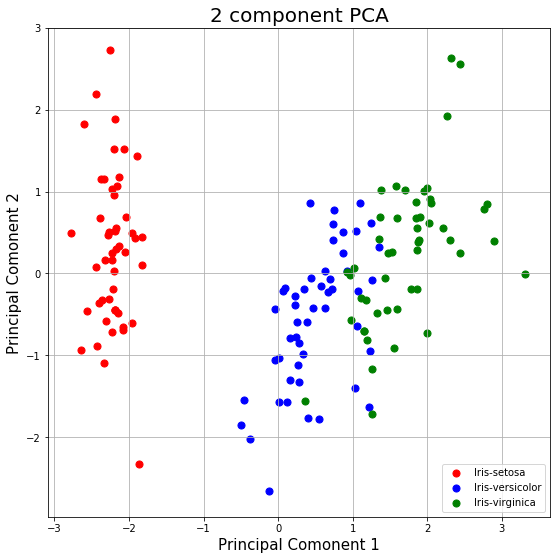

In [8]:
fig=plt.figure(figsize=(9,9))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Comonent 1',fontsize=15)
ax.set_ylabel('Principal Comonent 2',fontsize=15)
ax.set_title('2 component PCA',fontsize=20)
targets=['Iris-setosa','Iris-versicolor','Iris-virginica']
colors=['r','b','g']
for target, color in zip(targets,colors):
    indices=finalDf['target']==target
    ax.scatter(finalDf.loc[indices,'principal component 1']
              ,finalDf.loc[indices,'principal component 2']
              ,c=color
              ,s=50)
ax.legend(targets)
ax.grid()

In [9]:
#explained variance
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])